<a href="https://colab.research.google.com/github/naresh-marimuthu/Machine-Learning-Projects/blob/main/Cancer_Detection_Deeplearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Cancer Detection using Deep leanring

# Import required libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import sklearn.datasets
from sklearn.model_selection import train_test_split

In [2]:
# load cancer dataset and analysis

breast_cancer_dataset = sklearn.datasets.load_breast_cancer()

In [3]:
print(breast_cancer_dataset)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [4]:
data_frame = pd.DataFrame(breast_cancer_dataset.data, columns = breast_cancer_dataset.feature_names)

In [5]:
data_frame['target'] = breast_cancer_dataset.target

In [6]:
data_frame.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [7]:
data_frame.isnull().sum()

,0
mean radius,0
mean texture,0
mean perimeter,0
mean area,0
mean smoothness,0
mean compactness,0
mean concavity,0
mean concave points,0
mean symmetry,0
mean fractal dimension,0


In [8]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [9]:
data_frame.shape

(569, 31)

In [10]:
data_frame.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [11]:
data_frame['target'].value_counts()

,count
target,
1,357
0,212


In [12]:
data_frame['mean radius'].median()

13.37

In [13]:
data_frame['mean area'].isna().value_counts()

,count
mean area,
False,569


# Inputs and Target definition and standarziation  

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
X = data_frame.drop('target', axis = 1)
Y = data_frame['target']


In [16]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [17]:
Y.head()

,target
0,0
1,0
2,0
3,0
4,0


In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [19]:
print(X.shape, X_train.shape, X_test.shape)
print(X_test)

(569, 30) (455, 30) (114, 30)
     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
528       13.940         13.17           90.31      594.2          0.12480   
291       14.960         19.10           97.03      687.3          0.08992   
467        9.668         18.10           61.06      286.3          0.08311   
108       22.270         19.67          152.80     1509.0          0.13260   
340       14.420         16.54           94.15      641.2          0.09751   
..           ...           ...             ...        ...              ...   
471       12.040         28.14           76.85      449.9          0.08752   
449       21.100         20.52          138.10     1384.0          0.09684   
24        16.650         21.38          110.00      904.6          0.11210   
38        14.990         25.20           95.54      698.8          0.09387   
230       17.050         19.08          113.40      895.0          0.11410   

     mean compactness  mean conca

In [20]:
stand_scaler = StandardScaler()
X_train_std = stand_scaler.fit_transform(X_train)


In [21]:
print(X_train_std)

[[-0.01330339  1.7757658  -0.01491962 ... -0.13236958 -1.08014517
  -0.03527943]
 [-0.8448276  -0.6284278  -0.87702746 ... -1.11552632 -0.85773964
  -0.72098905]
 [ 1.44755936  0.71180168  1.47428816 ...  0.87583964  0.4967602
   0.46321706]
 ...
 [-0.46608541 -1.49375484 -0.53234924 ... -1.32388956 -1.02997851
  -0.75145272]
 [-0.50025764 -1.62161319 -0.527814   ... -0.0987626   0.35796577
  -0.43906159]
 [ 0.96060511  1.21181916  1.00427242 ...  0.8956983  -1.23064515
   0.50697397]]


In [22]:
X_test_std = stand_scaler.transform(X_test)

In [23]:
print(X_test_std)

[[-0.04462793 -1.41612656 -0.05903514 ... -0.18278004 -1.23064515
  -0.6268286 ]
 [ 0.24583601 -0.06219797  0.21802678 ...  0.54129749  0.11047691
   0.0483572 ]
 [-1.26115925 -0.29051645 -1.26499659 ... -1.35138617  0.269338
  -0.28231213]
 ...
 [ 0.72709489  0.45836817  0.75277276 ...  1.46701686  1.19909344
   0.65319961]
 [ 0.25437907  1.33054477  0.15659489 ... -1.29043534 -2.22561725
  -1.59557344]
 [ 0.84100232 -0.06676434  0.8929529  ...  2.15137705  0.35629355
   0.37459546]]


# Model Building and training

In [24]:
model = keras.Sequential([
    keras.Input(shape=(30,)),
    keras.layers.Dense(20, activation ='relu'),
    keras.layers.Dense(2, activation ='sigmoid')
])

In [25]:
#Compiling

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['Accuracy'])

In [26]:
#model fit

history = model.fit(X_train_std, Y_train, validation_split=0.1, epochs=10)

Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - Accuracy: 0.6764 - loss: 0.6849 - val_Accuracy: 0.7826 - val_loss: 0.4558
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - Accuracy: 0.8185 - loss: 0.4479 - val_Accuracy: 0.8696 - val_loss: 0.3152
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - Accuracy: 0.8592 - loss: 0.3206 - val_Accuracy: 0.9348 - val_loss: 0.2498
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - Accuracy: 0.8969 - loss: 0.2637 - val_Accuracy: 0.9565 - val_loss: 0.2117
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - Accuracy: 0.9070 - loss: 0.2322 - val_Accuracy: 0.9783 - val_loss: 0.1864
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - Accuracy: 0.9147 - loss: 0.2140 - val_Accuracy: 0.9783 - val_loss: 0.1692
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - Accuracy: 0.8985 - loss: 0.2134 - val_Accuracy: 0.9783 - val_loss: 0.1553
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - Accuracy: 0.9450 - loss: 0.1447 - val_Accuracy: 0.9783 - val_los

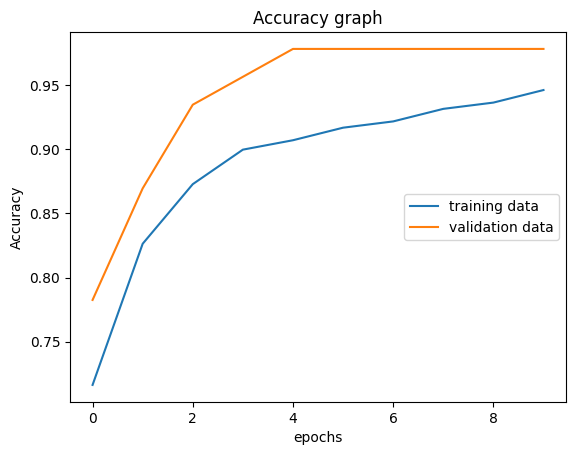

In [28]:
#Accuracy graph
import matplotlib.pyplot as plt

plt.plot(history.history['Accuracy'])
plt.plot(history.history['val_Accuracy'])

plt.title('Accuracy graph')
plt.xlabel('epochs')
plt.ylabel('Accuracy')

plt.legend(['training data', 'validation data'], loc = 'center right')


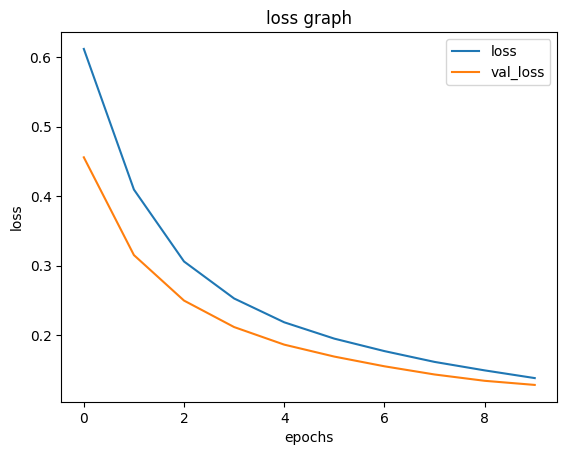

In [29]:
#loss graph

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('loss graph')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['loss', 'val_loss'], loc = 'upper right')

# Model evaluation

In [31]:
evaluate_result = model.evaluate(X_test_std, Y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - Accuracy: 0.9379 - loss: 0.1586


In [33]:
print(evaluate_result)

[0.15455973148345947, 0.9385964870452881]


# Model Prediction

In [34]:
X_predict_input = X_test_std[0]

In [37]:
print(X_predict_input.shape)

(30,)


In [38]:
X_predict_input = X_predict_input.reshape(1, -1)

In [39]:
X_predict_input.shape

(1, 30)

In [40]:
prediction_result = model.predict(X_predict_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


In [41]:
print(prediction_result)

[[0.2943367  0.56235313]]


In [46]:
max_index = np.argmax(prediction_result)

In [47]:
print(max_index)

1


In [48]:
if max_index == 0:
  print('Tumor is Malignant')
else:
  print('Tumor is benign')

Tumor is benign


# Consolidated Predict function

In [49]:
X_predict_input = X_test_std[1]
X_predict_input = X_predict_input.reshape(1, -1)

prediction_result = model.predict(X_predict_input)
max_index = np.argmax(prediction_result)


if max_index == 0:
  print('Tumor is Malignant')
else:
  print('Tumor is benign')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Tumor is Malignant
